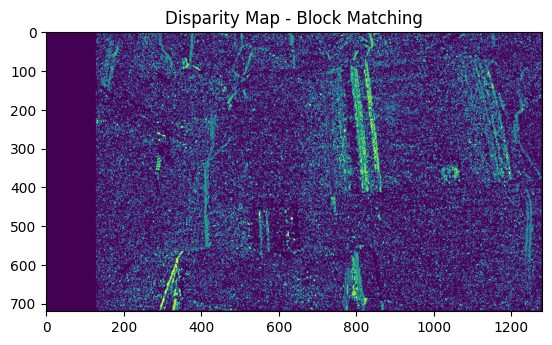

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_left = cv2.imread('./zed_div/Explorer_HD720_SN3299_12-52-45_left_half.png', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('./zed_div/Explorer_HD720_SN3299_12-52-45_right_half.png', cv2.IMREAD_GRAYSCALE)

# Set up block matching stereo
block_size = 5  # Size of the block window. Must be odd.
min_disp = 0    # Minimum possible disparity value
num_disp = 128   # Maximum disparity minus minimum disparity

# Create StereoBM object
stereo = cv2.StereoBM_create(numDisparities=num_disp, blockSize=block_size)

# Compute disparity map
disparity = stereo.compute(img_left, img_right)

# Normalize the disparity map for display
disparity = cv2.normalize(disparity, disparity, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity = np.uint8(disparity)

plt.imshow(disparity, cmap='viridis')
plt.title('Disparity Map - Block Matching')
plt.show()

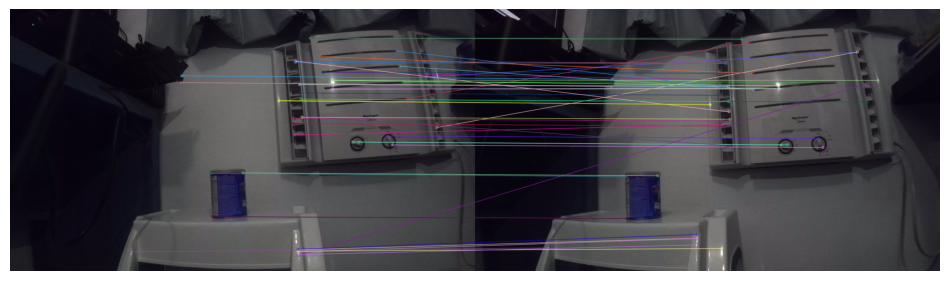

In [7]:
import cv2
from matplotlib import pyplot as plt

img_left = cv2.imread('./zed_div/Explorer_HD720_SN3299_12-52-45_left_half.png')
img_right = cv2.imread('./zed_div/Explorer_HD720_SN3299_12-52-45_right_half.png')

gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

# Cria o detector de características ORB (Oriented FAST and Rotated BRIEF)
orb = cv2.ORB_create()

# Detecta pontos-chave e calcula descritores para as duas imagens
keypoints_left, descriptors_left = orb.detectAndCompute(gray_left, None)
keypoints_right, descriptors_right = orb.detectAndCompute(gray_right, None)

# Cria o objeto BFMatcher, que faz a correspondência de descritores usando a norma de Hamming
# crossCheck=True assegura que apenas correspondências bidirecionais sejam consideradas
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontra as correspondências entre os descritores das duas imagens
matches = bf.match(descriptors_left, descriptors_right)

# Ordena as correspondências com base na distância (quanto menor, melhor a correspondência)
matches = sorted(matches, key=lambda x: x.distance)

# Desenha as correspondências entre as imagens
img_matches = cv2.drawMatches(
    img_left, keypoints_left,
    img_right, keypoints_right,
    matches[:50], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12, 6))
plt.imshow(img_matches)
plt.axis('off')
plt.show()

In [2]:
from PIL import Image
import os

# Caminho da pasta contendo as imagens
input_folder = './zed'
output_folder = './zed_div'

# Criar a pasta de saída se não existir
os.makedirs(output_folder, exist_ok=True)

# Listar todos os arquivos na pasta de entrada
for filename in os.listdir(input_folder):
    if filename.endswith('.png'):  # Processar apenas arquivos .png
        image_path = os.path.join(input_folder, filename)
        image = Image.open(image_path)

        # Remover o canal alfa, se presente
        if image.mode == 'RGBA':
            image = image.convert('RGB')

        width, height = image.size

        # Definir as metades esquerda e direita
        left_half = (0, 0, width // 2, height)
        right_half = (width // 2, 0, width, height)

        left_image = image.crop(left_half)
        right_image = image.crop(right_half)

        # Gerar nomes de arquivos para as imagens separadas
        base_filename = os.path.splitext(filename)[0]
        left_image_path = os.path.join(output_folder, f'{base_filename}_left_half.png')
        right_image_path = os.path.join(output_folder, f'{base_filename}_right_half.png')

        # Salvar as imagens
        left_image.save(left_image_path)
        right_image.save(right_image_path)

        print(f"Imagem {filename} dividida e salva com sucesso.")

Imagem DepthViewer_SbS_3299_376_10-07-2024-11-32-26.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-49-41.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-46-48.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-51-59.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-52-29.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-52-06.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-44-10.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-52-15.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-54-36.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-47-29.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-46-51.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-52-45.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-43-59.png dividida e salva com sucesso.
Imagem Explorer_HD720_SN3299_12-54-47.png dividida